In [5]:
# Step 2: Load the dataset
# Since the file is an image, you need to convert it to CSV before this step
# Assuming you have uploaded the file to Colab and converted it to 'dataset.csv'
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kagglee.json ~/.kaggle/
!chmod 600 ~/.kaggle/kagglee.json

Downloading dataset from kaggle

In [6]:
!kaggle datasets download -d chitwanmanchanda/fraudulent-transactions-data

Dataset URL: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data
License(s): CC0-1.0
 99% 176M/178M [00:07<00:00, 31.2MB/s]
100% 178M/178M [00:07<00:00, 26.4MB/s]


Unzipping dataset

In [7]:
!unzip fraudulent-transactions-data.zip -d /content

Archive:  fraudulent-transactions-data.zip
  inflating: /content/Fraud.csv      


In [8]:
import numpy as np
import pandas as pd

In [9]:
data_set =  pd.read_csv('/content/Fraud.csv')

In [10]:
maskFraud = data_set['isFraud'] == 1

In [11]:
fraud = data_set[maskFraud]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [12]:
non_fraud = data_set[~maskFraud]
non_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [13]:
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])
y = df_balanced['isFraud' ]
y.count()

16426

In [14]:
columns_dropped = ["step", "nameOrig", "nameDest", "oldbalanceDest", "newbalanceDest", "isFraud", "isFlaggedFraud"]

df_balanced.drop(columns = columns_dropped, inplace = True)

In [15]:
X = df_balanced
X

,type,amount,oldbalanceOrg,newbalanceOrig
2,TRANSFER,181.00,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00
251,TRANSFER,2806.00,2806.00,0.00
252,CASH_OUT,2806.00,2806.00,0.00
680,TRANSFER,20128.00,20128.00,0.00
...,...,...,...,...
4779354,CASH_OUT,265820.49,0.00,0.00
1913121,CASH_IN,186719.44,159.00,186878.44
1989584,CASH_OUT,136972.48,0.00,0.00
3085033,PAYMENT,9935.66,286287.65,276351.98


In [16]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or num_classes == 1:
            return {'leaf': True, 'class': np.argmax(np.bincount(y))}

        best_split = None
        best_gain = 0.0

        # Calculating the entropy of the current node (whole dataset)
        current_entropy = self._entropy(y)

        # Iterating over each feature to find the best split
        for feature_idx in range(num_features):
            feature_values = np.unique(X[:, feature_idx])

            if len(feature_values) > 10:  # Assuming a feature is continuous if it has more than 10 unique values
                # Continuous feature (Reduction of Variance for Splitting point)
                sorted_idx = np.argsort(X[:, feature_idx])
                for i in range(1, len(sorted_idx)):
                    if X[sorted_idx[i], feature_idx] != X[sorted_idx[i - 1], feature_idx]:
                        split_value = (X[sorted_idx[i], feature_idx] + X[sorted_idx[i - 1], feature_idx]) / 2.0
                        X_left, y_left, X_right, y_right = self._split_continuous(X, y, feature_idx, split_value)
                        gain = self._variance_reduction(y, y_left, y_right)
                        if gain > best_gain:
                            best_gain = gain
                            best_split = {'feature_idx': feature_idx, 'split_value': split_value,
                                          'X_left': X_left, 'y_left': y_left,
                                          'X_right': X_right, 'y_right': y_right}
            else:
                # Categorical feature
                for value in feature_values:
                    X_subset, y_subset = self._split_categorical(X, y, feature_idx, value)
                    # here current_entropy represents total info gain of perticular dataset, y_subset is splited labels, y[~(X[:, feature_idx] == value)] = y - y_subset
                    gain = self._information_gain(current_entropy, [y_subset, y[~(X[:, feature_idx] == value)]])
                    if gain > best_gain:
                        best_gain = gain
                        best_split = {'feature_idx': feature_idx, 'value': value,
                                      'X_subset': X_subset, 'y_subset': y_subset}

        if best_split is None:
            return {'leaf': True, 'class': np.argmax(np.bincount(y))}

        if 'split_value' in best_split:
            # Continuous split
            left_subtree = self._grow_tree(best_split['X_left'], best_split['y_left'], depth + 1)
            right_subtree = self._grow_tree(best_split['X_right'], best_split['y_right'], depth + 1)
            return {'leaf': False, 'feature_idx': best_split['feature_idx'],
                    'split_value': best_split['split_value'],
                    'left': left_subtree, 'right': right_subtree}
        else:
            # Categorical split
            remaining_X = X[~(X[:, best_split['feature_idx']] == best_split['value'])]
            remaining_y = y[~(X[:, best_split['feature_idx']] == best_split['value'])]
            subset_tree = self._grow_tree(best_split['X_subset'], best_split['y_subset'], depth + 1)
            remaining_tree = self._grow_tree(remaining_X, remaining_y, depth + 1)
            return {'leaf': False, 'feature_idx': best_split['feature_idx'], 'value': best_split['value'],
                    'subset': subset_tree, 'remaining': remaining_tree}

    def _entropy(self, y):
        x, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def _information_gain(self, parent_entropy, subsets):
        total = sum(len(subset) for subset in subsets)
        gain = parent_entropy - sum((len(subset) / total) * self._entropy(subset) for subset in subsets)
        return gain

    def _split_categorical(self, X, y, feature_idx, value):
        mask = X[:, feature_idx] == value
        return X[mask], y[mask]

    def _variance_reduction(self, parent, left, right):
        total_var = np.var(parent)
        left_var = np.var(left) if len(left) > 0 else 0
        right_var = np.var(right) if len(right) > 0 else 0
        total_size = len(left) + len(right)
        reduction = total_var - ((len(left) / total_size) * left_var + (len(right) / total_size) * right_var)
        return reduction

    def _split_continuous(self, X, y, feature_idx, split_value):
        mask_left = X[:, feature_idx] <= split_value
        mask_right = X[:, feature_idx] > split_value
        return X[mask_left], y[mask_left], X[mask_right], y[mask_right]

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if node['leaf']:
            return node['class']
        else:
            if 'split_value' in node:
                # Continuous split
                if x[node['feature_idx']] <= node['split_value']:
                    return self._predict_tree(x, node['left'])
                else:
                    return self._predict_tree(x, node['right'])
            else:
                # Categorical split
                if x[node['feature_idx']] == node['value']:
                    return self._predict_tree(x, node['subset'])
                else:
                    return self._predict_tree(x, node['remaining'])  # Follow the remaining tree


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [18]:
# Spliting train and test - hold out
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
x_train

array([['CASH_OUT', 64181.21, 64181.21, 0.0],
       ['CASH_OUT', 754874.26, 754874.26, 0.0],
       ['PAYMENT', 3411.77, 207115.79, 203704.02],
       ...,
       ['CASH_OUT', 156220.74, 156220.74, 0.0],
       ['TRANSFER', 1871553.73, 1871553.73, 0.0],
       ['CASH_IN', 98932.38, 1609496.52, 1708428.9]], dtype=object)

In [19]:
# Initialize and train the decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

In [20]:
predictions = dt.predict(x_test)
predictions

array([0, 0, 1, ..., 0, 0, 1])

In [21]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1637
           1       0.99      0.99      0.99      1649

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



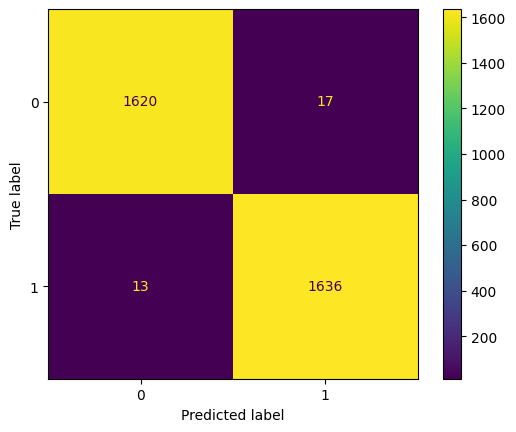

In [22]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()
plt.show()